In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.utils import resample
import numpy as np

In [2]:
headers = pd.read_csv('data/field_names.txt')

In [3]:
len(headers)

31

In [4]:
headers.head()

,ID
0,diagnosis
1,radius_mean
2,radius_sd_error
3,radius_worst
4,texture_mean


In [5]:
headers_list = ['id_number'] + [s[0] for s in headers.values]

In [6]:
data = pd.read_csv('data/breast-cancer.csv',header=None, names=headers_list)

In [7]:
data.head()

,id_number,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data = data.set_index('id_number')

In [9]:
data.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:

data_ex_diagnosis = data.loc[:,data.columns != 'diagnosis']
data_diagnosis = data['diagnosis']

In [11]:
transformer = MinMaxScaler()
transformed = transformer.fit_transform(data_ex_diagnosis)

In [12]:
transformed_df = pd.DataFrame(transformed, index=data.index, columns=[s[0] for s in headers.values[1:]])

In [13]:
transformed_df.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
transformed_df['diagnosis'] = data['diagnosis']

#### Mean smoothness factor by diagnosis

In [15]:
transformed_df.groupby('diagnosis').mean()['smoothness_mean']

diagnosis
B    0.058584
M    0.168069
Name: smoothness_mean, dtype: float64

#### Median smoothness factor by diagnosis

In [16]:
transformed_df.groupby('diagnosis').median()['smoothness_mean']

diagnosis
B    0.051548
M    0.137704
Name: smoothness_mean, dtype: float64

#### Mean compactness factor by diagnosis

In [17]:
transformed_df.groupby('diagnosis').mean()['compactness_mean']

diagnosis
B    0.144097
M    0.225532
Name: compactness_mean, dtype: float64

#### Median compactness by diagnosis 

In [18]:
transformed_df.groupby('diagnosis').median()['compactness_mean']

diagnosis
B    0.105582
M    0.197810
Name: compactness_mean, dtype: float64

### Let's do a t-test to see if they come from different populations 

In [19]:
B_smoothness = transformed_df.loc[transformed_df['diagnosis'] == 'B'].smoothness_mean
M_smoothness = transformed_df.loc[transformed_df['diagnosis'] == 'M'].smoothness_mean
t2, p2 = stats.ttest_ind(B_smoothness,M_smoothness)
t2

-15.934158019257904

### Our p value is quite low, so we can reject the null hypothesis 

In [20]:
p2

1.651905175849735e-47

### Let's do a t-test on our compactness to see if they come from different populations 

In [21]:
B_compactness = transformed_df.loc[transformed_df['diagnosis'] == 'B'].compactness_mean
M_compactness = transformed_df.loc[transformed_df['diagnosis'] == 'M'].compactness_mean
t2, p2 = stats.ttest_ind(B_compactness,M_compactness)


### Our p value is quite low, so we can reject the null hypothesis 

In [22]:
p2

9.975994654074946e-13

In [23]:
def bootstrap(data, replace=True, n_samples=len(data)):
    '''
    Generates bootstrapped dataset using initial dataset with replacement
    
    
    Parameters
    ==========
    data: pd.DataFrame()
    replace: bool
    n_samples: int
    
    Returns
    =======
    pd.DataFrame of shape n_samples x cols of data
    
    '''
    from sklearn.utils import resample
    
    
    return resample(transformed_df, replace=replace, n_samples=n_samples)
    

#### We can see that we are getting different samples from our bootstrap since we have different means

In [24]:
bts1 = bootstrap(transformed_df)
bts1.mean()[0]

0.3329052990330304

In [25]:
bts2 = bootstrap(transformed_df)
bts2.mean()[0]

0.3367501217102972

#### Let's do some EDA on our data

In [26]:
data['radius_bin'] = pd.cut(data['radius_mean'], 10)

In [27]:
data.groupby(['radius_bin','diagnosis']).size()

radius_bin        diagnosis
(6.96, 9.094]     B             19
(9.094, 11.207]   B             77
                  M              2
(11.207, 13.32]   B            170
                  M             15
(13.32, 15.433]   B             83
                  M             46
(15.433, 17.545]  B              7
                  M             48
(17.545, 19.658]  B              1
                  M             49
(19.658, 21.771]  M             38
(21.771, 23.884]  M              7
(23.884, 25.997]  M              4
(25.997, 28.11]   M              3
dtype: int64

In [28]:
B = data.loc[data['diagnosis'] == 'B']
M = data.loc[data['diagnosis'] == 'M']
B_radius = B.groupby('radius_bin').size()
M_radius = M.groupby('radius_bin').size()

#### We can see that Benign and Malignant tumors have different distributions for mean radius

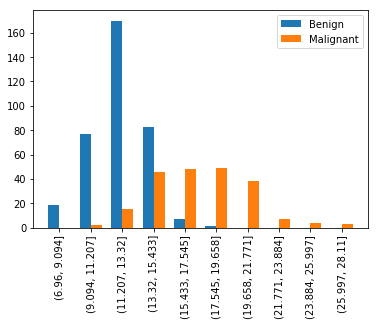

In [29]:
categories = data['radius_bin'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, B_radius, width, label='Benign')
plt.bar(ind + width, M_radius, width,
    label='Malignant')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()

#### We can see that Benign and Malignant tumors have different distributions for mean compactness

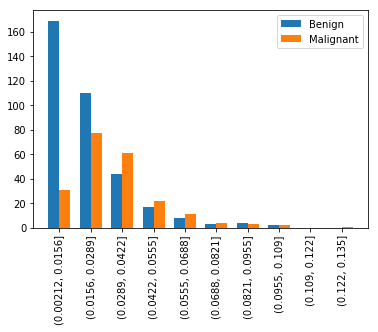

In [30]:
data['compactness_bin'] = pd.cut(data['compactness_mean'], 10)

B = data.loc[data['diagnosis'] == 'B']
M = data.loc[data['diagnosis'] == 'M']
B_compactness = B.groupby('compactness_bin').size()
M_compactness = M.groupby('compactness_bin').size()

categories = data['compactness_bin'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, B_compactness, width, label='Benign')
plt.bar(ind + width, M_compactness, width,
    label='Malignant')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()

#### We can see that Benign and Malignant tumors have different distributions for mean smoothness

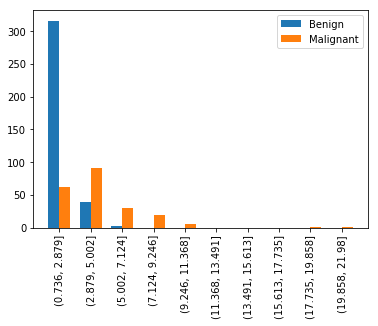

In [31]:
data['smoothness_bin'] = pd.cut(data['smoothness_mean'], 10)
B = data.loc[data['diagnosis'] == 'B']
M = data.loc[data['diagnosis'] == 'M']
B_smoothness = B.groupby('smoothness_bin').size()
M_smoothness = M.groupby('smoothness_bin').size()

categories = data['smoothness_bin'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.35       
plt.bar(ind, B_smoothness, width, label='Benign')
plt.bar(ind + width, M_smoothness, width,
    label='Malignant')

plt.xticks(ind + width / 2, categories)
plt.legend(loc='best')
plt.xticks(rotation = 90)
plt.show()

### Let's build a model

* We'll use Logistic Regression and Random Forest since these are classification problems

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score

In [33]:
transformed_df['diagnosis']  = (transformed_df['diagnosis'] == 'M').astype(int)
transformed_df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [34]:
X = transformed_df[transformed_df.columns[:-1]]
y = transformed_df['diagnosis']

### Train test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)


### Fit our training set

* The default penalty for the sci-kit learn implementation of Logistic Regression is L2
* The penaltywill use a L2 penalty, also known as 

In [96]:
clf = LogisticRegression(solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### Let's look at our F1 score

In [97]:
preds = clf.predict(X_test)


In [98]:
f1_score(y_test.values, clf.predict(X_test))

0.9565217391304348

#### Let's select our top features

In [39]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X_train)
X_train.columns[model.get_support(indices=True)]

Index(['radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean',
       'perimeter_mean', 'perimeter_sd_error', 'area_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_worst',
       'fractal_dimension_mean'],
      dtype='object')

#### Let's look at Random Forest

In [111]:
clf_rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, max_depth=20, max_features=10)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### How did this model do?

In [112]:
f1_score(y_test, clf_rf.predict(X_test))

0.943661971830986

### What are top features?

In [42]:
model = SelectFromModel(clf_rf, prefit=True)
X_new = model.transform(X_train)

In [43]:
X_train.columns[model.get_support(indices=True)]

Index(['radius_mean', 'radius_worst', 'texture_mean', 'perimeter_mean',
       'perimeter_sd_error', 'smoothness_sd_error', 'concavity_worst',
       'concave_points_sd_error', 'concave_points_worst', 'symmetry_worst',
       'fractal_dimension_mean'],
      dtype='object')

#### We can also use sklearn's `SelectKBest` feature to help us determine top features

In [44]:
from sklearn.feature_selection import SelectKBest

model = SelectKBest(k=10)
X_new = model.fit_transform(X_train, y_train)

X_train.columns[model.get_support(indices=True)]

Index(['radius_mean', 'radius_worst', 'texture_mean', 'perimeter_mean',
       'perimeter_sd_error', 'concavity_worst', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_mean'],
      dtype='object')

### Dealing with overfitting

* Logistic Regression
    * We can adjust the solvers that we use 
    * Adjusting the solver may give us access to different regularization techniques penalize overfitting
    * We can also adjust the regularization parameter C. 

* Random Forest
    * With Random Forests we can adjust the following parameters:
        * `n_estimators`: More estimators will reduce the liklihood of overfitting
        * `max_features`: reducing this number will reduce the likliehood of overfitting
        * `min_samples_leaf`: branches will stop splitting once each leaf contains this number of samples reducing overfitting
        * `max_depth`: each tree will stop after `max_depth` splits, reducing the complexity of the models and chance for overfitting
    

## Explanation

### Technical
* Since we have a binary classification problem here Logistic and Random Fores are good choices
* Models that may have performed better would be NaiveBayes or SVM
* Our sample size was quite small
* We could increase the size dataset with bootstrapping and then train on the larger dataset
* Our target data had fairly balanced classes so the fact that we getting predictions in mid 90s is reassuring
* We can perform a Grid Search to find optimal parameters
* With our parameter tuned Logistic Regression model we achieve an F1 score of 97%
    
### Non-technical
* We compared two models Logistic Regression and Random Forests
* Logistic Regression is a binary classification estimator that decides between two classes of outcomes
* In this case our Logistic Regression predicts whether or not an observation is malignant or benign
* The simplest unit of the Random Forest is one Decision Tree and we refer to these as estimators in our analysis
* Each estimator makes a prediction for each case as benign or malignant
* Our Random Forest is an aggregation of predictions across our decision tree estimators
* To evaluate the accuracy of our models we used a variety of scoring techniques
* When we adjust some of the model parameters we can increase the accruacy of our model to 97%
    

### We can use a GridSearch to find good parameters for our models
* Be aware that the more parameter combinations you use will increase the compute time

In [115]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('classifier' , RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['lbfgs']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,401,10)),
    'classifier__max_features' : list(range(6,31,5)),
#     'classifier__min_samples_leaf': list(range(1,10)),
#     'classifier__max_depth': list(range(1,10))
    }
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:  2.2min finished
/Users/justinsimcock/miniconda3/envs/dawp/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [116]:
best_clf.best_estimator_.get_params()['classifier']

LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [117]:
print('Model accuracy is',best_clf.score(X_test, y_test))

Model accuracy is 0.973404255319149


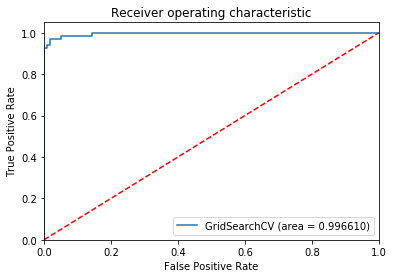

In [118]:
probs = best_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [119]:
roc_auc

0.9966101694915254

In [120]:
preds = best_clf.predict(X_test)

accuracy = metrics.accuracy_score(preds, y_test)
print(f'accuracy: {accuracy}')
print()
balanced_accuracy = metrics.balanced_accuracy_score(preds, y_test)
print(f'balanced accuracy: {balanced_accuracy}')
print()
precision = metrics.precision_score(preds, y_test)
print(f'precision: {precision}')
print()
average_precision = metrics.average_precision_score(preds, y_test)
print(f'average precision: {average_precision}')
print()
f1_score = metrics.f1_score(preds, y_test)
print(f'f1 score: {f1_score}')
print()
recall = metrics.recall_score(preds, y_test)
print(f'recall: {recall}')
print()
print(f'roc auc: {roc_auc}')


accuracy: 0.973404255319149

balanced accuracy: 0.976008387813001

precision: 0.9428571428571428

average precision: 0.9341037971238034

f1 score: 0.9635036496350364

recall: 0.9850746268656716

roc auc: 0.9966101694915254


In [121]:

print(metrics.classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       121
           1       0.94      0.99      0.96        67

   micro avg       0.97      0.97      0.97       188
   macro avg       0.97      0.98      0.97       188
weighted avg       0.97      0.97      0.97       188



## PART 2

### Student 1

* My comments indicated by `##`

In [52]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
## this fails because LinearRegression Class is not directly importable
## Try this: from sklearn.linear_model import LinearRegression
from sklearn import LinearRegression

## this also failes because we need `cross_validation` is not the correct subdirectory
## Try this: from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score

# Load data
#we need a better variable name than `d`
d = pd.read_csv('data/train.csv')


# Setup data for prediction
## This will throw an error since we've assigned our dataframe to the `d` variable
x1 = data.SalaryNormalized

# Should we consider any other features that may influence salary than the type of contract?
x2 = pd.get_dummies(data.ContractType)

# Setup model

# Are there other models you could consider in addition to linear regression?
model = LinearRegression()

# Evaluate model

## These imports are most appropriate at the top
## We've already imported cross_val_score
## We attempt to import train_test_split but never use it
## This is the wrong subfolder for the train_test_split function
## To import try this: from sklearn.model_selection import train_test_split
## Using a value of `1` for the cv option is inappropriate. This will throw an error. It needs to be at least two
## The default value is 3 in the current version and will be 5 in v 0.22 of sklearn
## The string `mean_absolute_error used in the scoring function is not a valid parameter value
## Try values from here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

### Student 2

In [53]:
!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

## This will throw an error since its being imported from the wrong location in sklearn
## Try this: from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score

# Load data

data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized

# Should we consider any other features that may influence salary than the type of contract?
X = pd.get_dummies(data.ContractType)

# Setup model

# Are there other models you could consider in addition to linear regression?
model = LinearRegression()

# Evaluate model

## The string `mean_absolute_error used in the scoring function is not a valid parameter value
## Try values from here: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())